In [76]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

plt.rcParams['figure.figsize'] = 12, 8

### 2.3

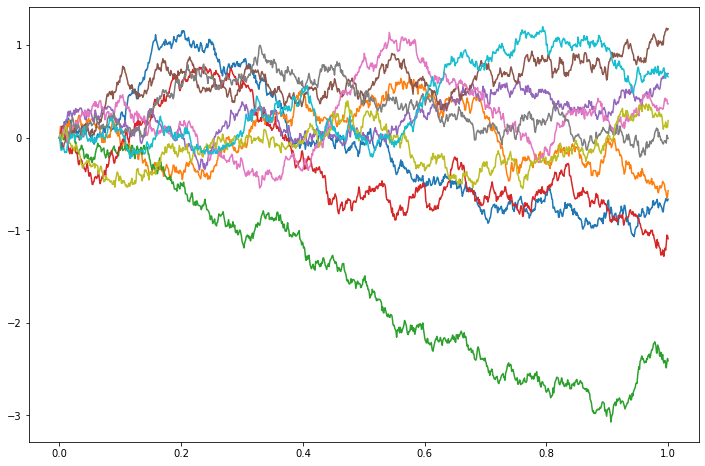

In [13]:
#Свойство независимых приращений
process_cnt = 10
t_sep = np.linspace(0, 1, 1001)
ws = [np.zeros(10)]
for l in range(1000):
    v = np.random.normal(loc = 0.0, scale = np.sqrt(0.001), size = process_cnt)
    ws.append(ws[l]+v)

ws = np.array(ws).T
for w in ws:
    plt.plot(t_sep,w)
plt.show()

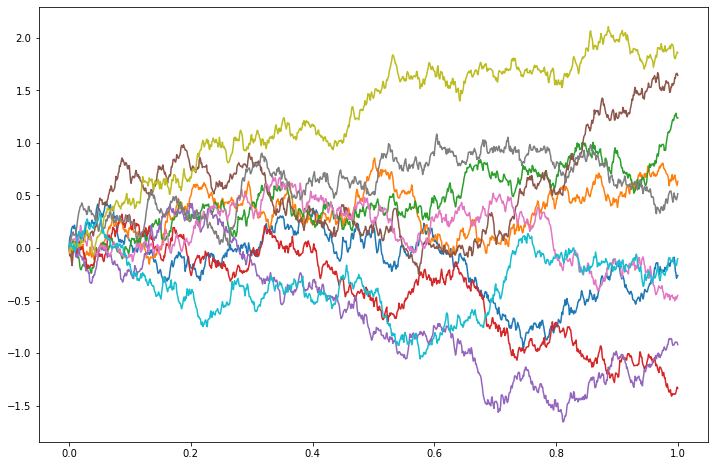

In [59]:
#6 свойство
'''
Uses f_n(x) = sqrt(2) * cos(pi * n * x), n = 1, 2, ... as basis functions
int(f_n) = sqrt(2)*sin(pi*n)/(pi*n)
'''
process_cnt = 10
order = 1000
t_sep = np.linspace(0, 1, 1001)
ws = []
for l in range(process_cnt):
    V = np.random.randn(order+1)
    w=[]
    for t in t_sep:
        n = np.arange(1,order+1)
        decomp = np.sqrt(2)*np.sin(np.pi*n*t)/(np.pi*n)
        decomp = np.hstack((np.array([t])[np.newaxis,:], decomp[np.newaxis,:]))[0]
        w.append(np.sum(decomp*V))
    ws.append(w)
for w in ws:
    plt.plot(t_sep,w)
plt.show()

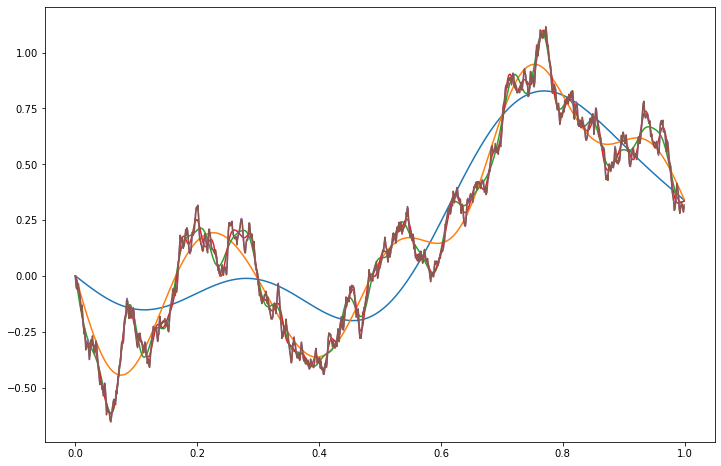

In [63]:
V = np.random.randn(order+1)
t_sep = np.linspace(0, 0.999, 1000)
ws = []
for order in [5, 10, 50, 100, 500, 1000]:
    w=[]
    for t in t_sep:
        n = np.arange(1,order+1)
        decomp = np.sqrt(2)*np.sin(np.pi*n*t)/(np.pi*n)
        decomp = np.hstack((np.array([t])[np.newaxis,:], decomp[np.newaxis,:]))[0]
        w.append(np.sum(decomp*V[:order+1]))
    ws.append(w)
for w in ws:
    plt.plot(t_sep,w)
plt.show()

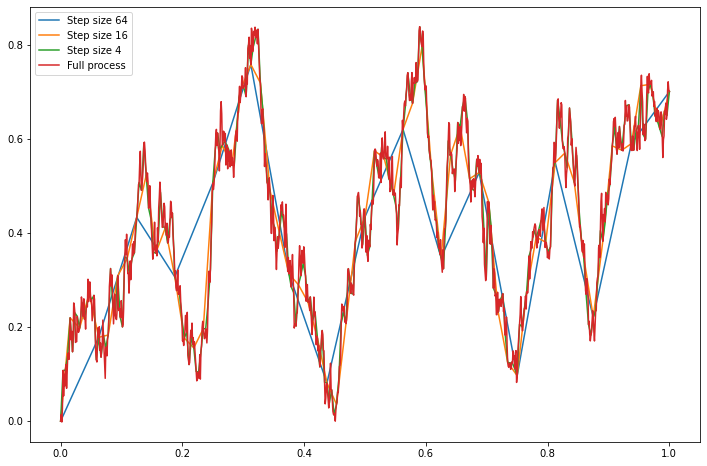

In [98]:
#Свойство 17
t_sep = np.linspace(0, 1, 1025)
initial_increments = np.zeros(2**4 + 1)
initial_increments[1:] = np.random.randn(2**4) / 4
process = np.zeros_like(t_sep)
process[::2**6] = np.cumsum(initial_increments)

for step in (64, 32, 16, 8, 4, 2):
    mu = np.zeros_like(process)
    mu[step//2::step] = process[:-1:step] + np.diff(process[::step]) / 2
    sd = np.sqrt(step / (len(process) - 1)) / 2
    noise = np.random.randn(len(process[step//2::step]))
    process[step//2::step] = mu[step//2::step] + noise * sd
    
for step in (64, 16, 4):
    sns.lineplot(x=t_sep[::step], y=process[::step], label=f'Step size {step}')
sns.lineplot(x=t_sep, y=process, label='Full process')
plt.show()


### 2.4

In [92]:
for n in range(26):
    summ = np.sum(np.random.normal(loc = 0.0, scale = np.sqrt(pow(2,-n)), size = (10,pow(2, n)))**2, axis = 1)
    print(n,': ', np.mean(summ))

0 :  0.7964510420111282
1 :  0.9446031372609118
2 :  1.1958188745022473
3 :  1.1798678065377648
4 :  1.2009314611335884
5 :  1.0734740987956468
6 :  1.0037116225592848
7 :  0.9605332694669274
8 :  1.00898033499807
9 :  1.0090463168835733
10 :  1.0199225605361035
11 :  1.0087174731089767
12 :  1.0024055934097453
13 :  0.9981935484207263
14 :  1.0005320835656033
15 :  0.9937934986369502
16 :  0.9987744508152117
17 :  1.0017020543642134
18 :  0.9997105440585811
19 :  0.9985130796381808
20 :  0.9999597645425551
21 :  0.9997262434465897
22 :  1.0000812705194648
23 :  0.9998314622077744
24 :  1.0001590052053884
25 :  1.0000545677556905


### 2.5

Rn:  0.07521467143847786
appr Rn:  0.07766482469298508

Qn:  0.5767745746632986
appr Qn:  0.5776648246929851


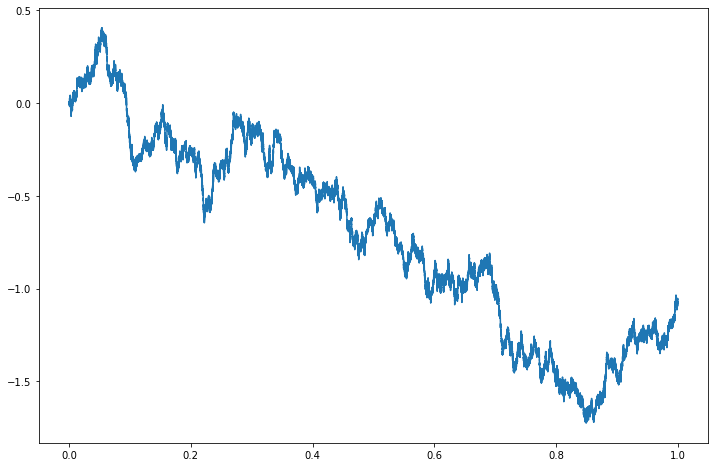

In [99]:
t_sep = np.linspace(0, 1, 10**6+1)
w = [0]
for l in range(10**6):
    v = np.random.normal(loc = 0.0, scale = np.sqrt(10**(-6)))
    w.append(w[l]+v)


Rn = sum([w[i-1]*(w[i]-w[i-1]) for i in range(1,1000000)])
Qn = sum([((w[i-1]+w[i])/2)*(w[i]-w[i-1]) for i in range(1,1000000)])
print('Rn: ', Rn)
print('appr Rn: ', (w[-1]*w[-1]-1)/2)
print()
print('Qn: ', Qn)
print('appr Qn: ', (w[-1]*w[-1])/2)

plt.plot(t_sep,w)
plt.show()